Rocket Flight Assignment

In [1]:
from math import pi
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Model parameters
ms = 50
g = 9.81
rho = 1.091
r = 0.5
ve = 325
Cd = 0.15
mp0 = 100
mpp0 = 20

# Driven parameters
A = pi*r**2
burn_time = mp0/mpp0

# Numerical Parameters
dt = 0.1
N = int(15*burn_time/dt)

# Initial conditions
h0 = 0
v0 = 0

# Array initialization
t = numpy.linspace(0,dt*N,N+1)
x = numpy.empty((N+1,2))
x[0,0] = h0
x[0,1] = v0

# Time-Varying burn rate array
mpp = numpy.empty(N+1)
mpp[0:int(burn_time/dt)] = mpp0
mpp[int(burn_time/dt):N] = 0

# Time-varying propellant mass array
mp = numpy.empty(N+1)
mp[0:int(burn_time/dt)+1] = numpy.linspace(mp0,0,int(burn_time/dt)+1)
mp[int(burn_time/dt)+1:N] = 0

# Time varying total mass array
m = ms + mp

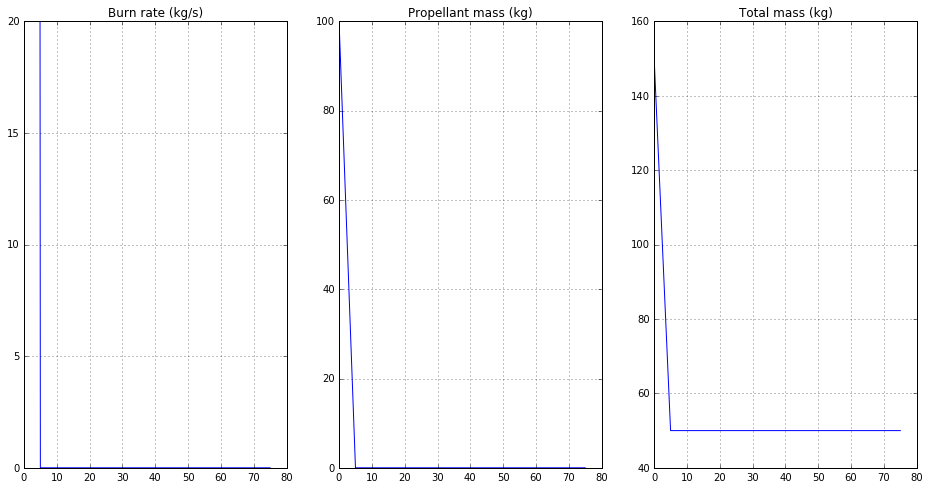

In [3]:
# visualization of the burn rate
pyplot.figure(figsize=(16,8))
pyplot.subplot(131)
pyplot.grid(T1.5rue)
pyplot.title('Burn rate (kg/s)')
pyplot.plot(t,mpp);

# visualization of the propellant mass
pyplot.subplot(132)
pyplot.grid(True)
pyplot.title('Propellant mass (kg)')
pyplot.plot(t,mp);

# visualization of the total mass
pyplot.subplot(133)
pyplot.grid(True)
pyplot.title('Total mass (kg)')
pyplot.plot(t,m);

In [4]:
# Time marching iterations with impact inRemainingdex seeking
impact = 0
dxdt = numpy.empty(2)
for i in range(N):
    dxdt[0] = x[i,1]
    dxdt[1] = -g + mpp[i]*ve/m[i] - 0.5*rho*A*Cd/m[i]*x[i,1]*numpy.absolute(x[i,1])
    x[i+1] = x[i] + dt*dxdt
    if x[i+1,0]<0 and not impact:
        impact = 1
        i_impact = i + 1

# Trim arrays to keep only one iterations after touchdown
tflight = t[0:i_impact+1]
h = x[0:i_impact+1,0]
v = x[0:i_impact+1,1]

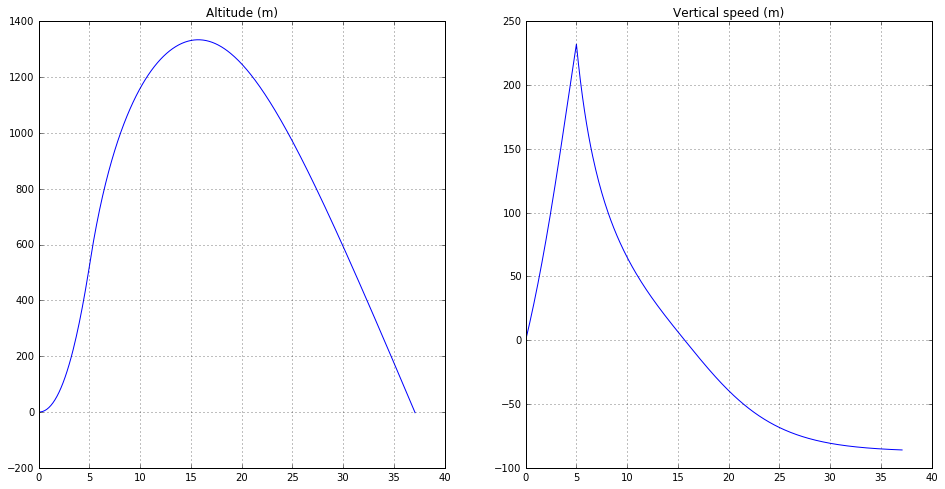

In [5]:
# visualization of the height
pyplot.figure(figsize=(16,8))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.title('Altitude (m)')
pyplot.plot(tflight,h);

# visualization of the speed
pyplot.subplot(122)
pyplot.grid(True)
pyplot.title('Vertical speed (m)')
pyplot.plot(tflight,v);


In [6]:
# Remaining fuel
it_3_2 = numpy.absolute(t-3.2).argmin(axis=0)
mp_3_2 = mp[it_3_2]

# Maximum velocity
it_maxv = v.argmax(axis=0)
maxv = v[it_maxv]
t_maxv = tflight[it_maxv]
h_maxv = h[it_maxv]

# Maximum height
it_maxh = h.argmax(axis=0)
maxh = h[it_maxh]
t_maxh = tflight[it_maxh]

# Impact
t_impact = t[i_impact]
v_impact = v[i_impact]

In [7]:
# Print required output for validation
print('Remaining propellant at t = 3.2 s is','% 0.2f' % mp_3_2,'kg')
print('Maximum velocity is','% 0.2f' % maxv,'m/s')
print('Maximum velocity is reached at time','% 0.2f' % t_maxv,'s')
print('Maximum velocity is reached at altitude','% 0.2f' % h_maxv,'m')
print('Maximum altitude is','% 0.2f' % maxh,'m')
print('Maximum altitude is reached at time','% 0.2f' % t_maxh,'s')
print('Ground impact is reached at time','% 0.2f' % t_impact,'s')
print('Impact speed is','% 0.2f' % v_impact,'m/s')

Remaining propellant at t = 3.2 s is  36.00 kg
Maximum velocity is  232.11 m/s
Maximum velocity is reached at time  5.00 s
Maximum velocity is reached at altitude  523.52 m
Maximum altitude is  1334.18 m
Maximum altitude is reached at time  15.70 s
Ground impact is reached at time  37.10 s
Impact speed is -86.01 m/s
